Problem Statement:
In a typical financial based company, there will be various types of loans given to customers. However when the company receives a loan application, the company has to decide if loan can be given based on applicant's profile.
If we reject the loan and if the applicant is likely to repay the loan, then there will be loss of business to the company. If the loan is approved and in case the loan is not repaid then it will be a loss for the company.

We need to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default which will help the company use this and assess the risk

In [1]:
# Import all the libraries up front
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read all the rows and columns from the csv file
loan_info = pd.read_csv("loan.csv")

In [7]:
# Print first 5 rows from the csv data. This ensures there is no issue reading the csv file
loan_info.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
# Check total number of rows and columns availalbe
loan_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [10]:
# Check datatypes for each column which will help to understand if there is anything which is required for casting or conversion
loan_info.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

Data Cleanig
First we will need to clean the data before we proceed with further analysis
Below are the steps which we will do for the cleanup:
1. If there are any duplicate rows
2. If there are too many null values
   i. If all the row values has null or NA then we will remove the entire row
   ii. If all the values in a column has null or NA then we will remove the entire row
3. If there are some values which is of null and if the subset of data is small then we will remove it
4. Analyze all the columns and remove those which is not needed for the analysis

In [11]:
# There could be more than 1 loan taken by 1 member hence removing duplicates by member_id is not idle. 
# We will check for duplicate data by id to see if there is anything repeated by mistake
print(loan_info[loan_info.duplicated(['id'])])

# Since there are no duplicates we will not do any further action

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, tot

In [12]:
# Check for null or NA values in the entire data
loan_info.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [13]:
# Check if each values in the row has null or NA
print(loan_info.isnull().all(axis=1).sum())

# Since there are no null or NA then we will not take any other action

0


In [14]:
# Check if all the data has null or NA values based on each columns
print(loan_info.isnull().all(axis=0).sum())

54


In [15]:
# Since there are many columns which doesn't have proper values, remove those columns
loan_info.dropna(axis = 1, how = 'all', inplace = True)

In [16]:
# Now check how many columns are available after removing some columns
loan_info.shape

(39717, 57)

In [17]:
# Based on the analysis, we feel the below columns are not required to find out if the customers can default the loan.
# Hence removing the columns
loan_info.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)

In [18]:
# Now check how many columns are available after removing some columns
loan_info.shape

(39717, 48)

Univariate Analysis:
We will pick the columns which needs an analysis to be done based on category:
Unordered Categorical Variables
1. emp_length - This is to analyze on the employees length
2. int_rate - Is there an higher interest rate hence the defaulting of loan
3. revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit
4. total_pymnt - Total Amount which is repaid as part of the loan
5. loan_amnt - Total Amount of the loan taken
Ordered Categorical Variables
1. loan_status - Status of the loan
2. purpose - What purpose was the loan taken
3. grade - Loan Grade
4. sub_grade - Loan Subgrade

In [19]:
# Check the mode of emp_length which will help us see if we need to use that value to fill the missing values.
# This is to analyze if the defaulted ones are of lesser experiences or most experienced ones.
print("Mode : " + loan_info.emp_length.mode()[0])
loan_info.emp_length.value_counts()

# The above value count shows that the mode value has too far higher frequency than that of the next immediate frequent value. 
# We will assume that the loan taken is recent ones and hence the data is yet to be updated.
# Based on that, and also the missing values are in very low percentage, so imputung with mode value doesnt affect data much

Mode : 10+ years


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [20]:
# Find the missing values of emp_length
loan_info.emp_length.isna().sum()

1075

In [21]:
# Find the missing values of emp_length and fill them with 0
loan_info.emp_length.fillna('0',inplace=True)

In [22]:
# Check if there are still any missing values of emp_length
loan_info.emp_length.isna().sum()

0

In [23]:
# To do further analysis or plot a chart, we will need to remove the % in the data and have only numeric values
loan_info['emp_length']=loan_info.emp_length.str.extract('(\d+)')
loan_info.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [24]:
# Print of number of loans under respective emp experience
loan_info.emp_length.value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: emp_length, dtype: int64

In [25]:
# Check if int_rate has any null values
loan_info.int_rate.isna().sum()

0

In [26]:
# Check if revol_util has any null values
loan_info.revol_util.isna().sum()

50

In [27]:
# Data cleaning
# Lets remove % symbol from intrest rate column so that it can be used in calculations
loan_info['int_rate'] = loan_info['int_rate'].str.rstrip('%')

# Lets remove % symbol from revol_util column so that it can be used in calculations
loan_info['revol_util'] = loan_info['revol_util'].str.rstrip('%')

In [28]:
# convert amount columns into numeric data to find some correlation among important ones.

cols_to_numeric = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt', "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "delinq_2yrs", "revol_util"]
loan_info[cols_to_numeric] = loan_info[cols_to_numeric].apply(pd.to_numeric)

In [29]:
# Check the data type of each column after conversion
loan_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        39717 non-null  int64  
 1   member_id                 39717 non-null  int64  
 2   loan_amnt                 39717 non-null  int64  
 3   funded_amnt               39717 non-null  int64  
 4   funded_amnt_inv           39717 non-null  float64
 5   term                      39717 non-null  object 
 6   int_rate                  39717 non-null  float64
 7   installment               39717 non-null  float64
 8   grade                     39717 non-null  object 
 9   sub_grade                 39717 non-null  object 
 10  emp_title                 37258 non-null  object 
 11  emp_length                39717 non-null  int64  
 12  home_ownership            39717 non-null  object 
 13  annual_inc                39717 non-null  float64
 14  verifi

Analyze annual_inc data

In [30]:
loan_info['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<Axes: >

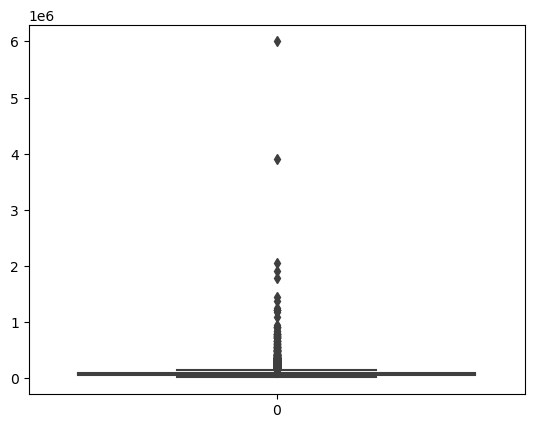

In [31]:
# Plot a chart to see the outliers
sns.boxplot(loan_info.annual_inc)

In [32]:
# Check the quantile of the annual_inc
loan_info.annual_inc.quantile([0.75,0.95,0.99,1.0])

0.75      82300.00
0.95     142000.00
0.99     234999.36
1.00    6000000.00
Name: annual_inc, dtype: float64

In [33]:
# Remove Outliers with quantile .95 from Annual Income
loan_info = loan_info[loan_info["annual_inc"] < loan_info["annual_inc"].quantile(0.95)]

<Axes: >

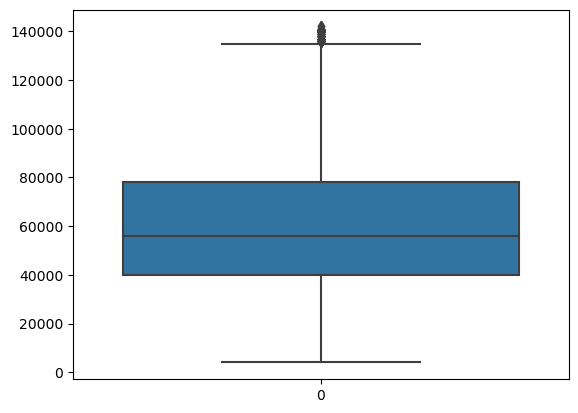

In [34]:
# Plot a chart to see how it looks after removing outliers
sns.boxplot(loan_info.annual_inc)

In [35]:
loan_info.total_pymnt.describe()

count    37730.000000
mean     11711.691312
std       8631.594046
min          0.000000
25%       5478.801776
50%       9571.946635
75%      15897.655000
max      58563.679930
Name: total_pymnt, dtype: float64

<Axes: >

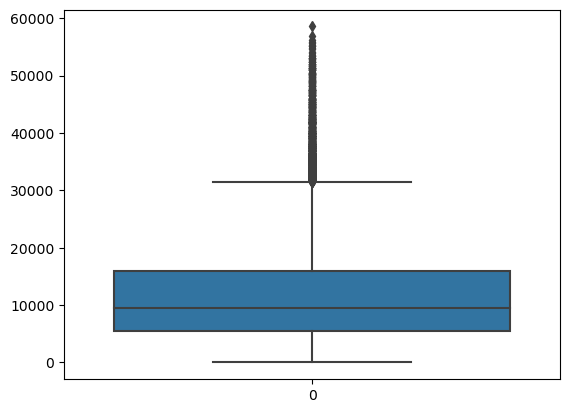

In [36]:
# Plot a chart to see the outliers of total_pymnt
sns.boxplot(loan_info.total_pymnt)

# Based on the plot, we see the distribution of the values are continous hence we will not require to remove
# any outliers for total_pymnt

In [37]:
loan_info.loan_amnt.describe()

count    37730.000000
mean     10845.205407
std       7153.931580
min        500.000000
25%       5075.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: >

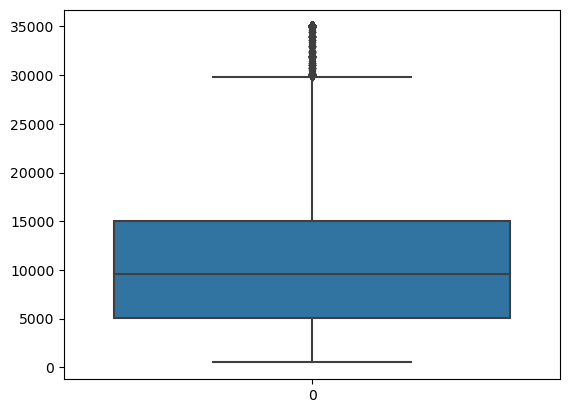

In [38]:
# Plot a chart to see the outliers of loan_amnt
sns.boxplot(loan_info.loan_amnt)

# Based on the plot, we see the distribution of the values are continous hence we will not require to remove 
# any outliers for loan_amnt

Visualizing Unordered Categorical Data

In [39]:
loan_info.loan_status.describe()

count          37730
unique             3
top       Fully Paid
freq           31256
Name: loan_status, dtype: object

<Axes: xlabel='loan_status', ylabel='count'>

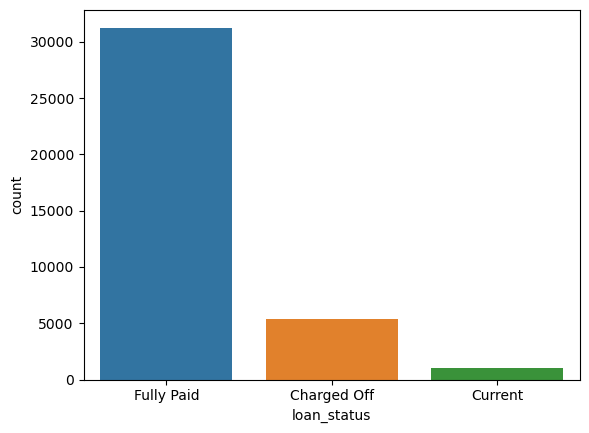

In [40]:
# Plot a chart to see the outliers of loan_status
sns.countplot(x = 'loan_status', data = loan_info)

In [41]:
loan_info.grade.describe()

count     37730
unique        7
top           B
freq      11430
Name: grade, dtype: object

<Axes: xlabel='grade', ylabel='count'>

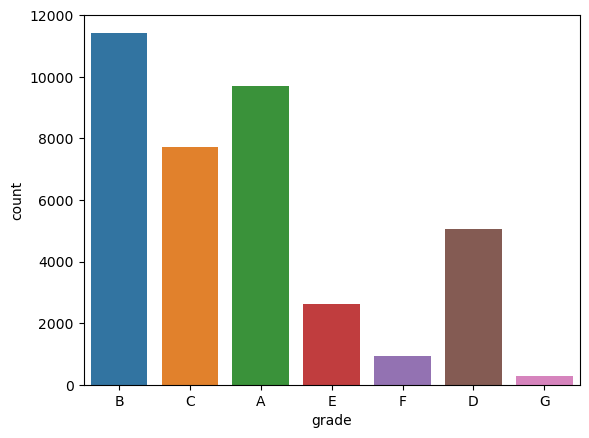

In [42]:
# Plot a chart to see the outliers of grade
sns.countplot(x = 'grade', data = loan_info)

In [43]:
loan_info.sub_grade.describe()

count     37730
unique       35
top          A4
freq       2765
Name: sub_grade, dtype: object

<Axes: xlabel='sub_grade', ylabel='count'>

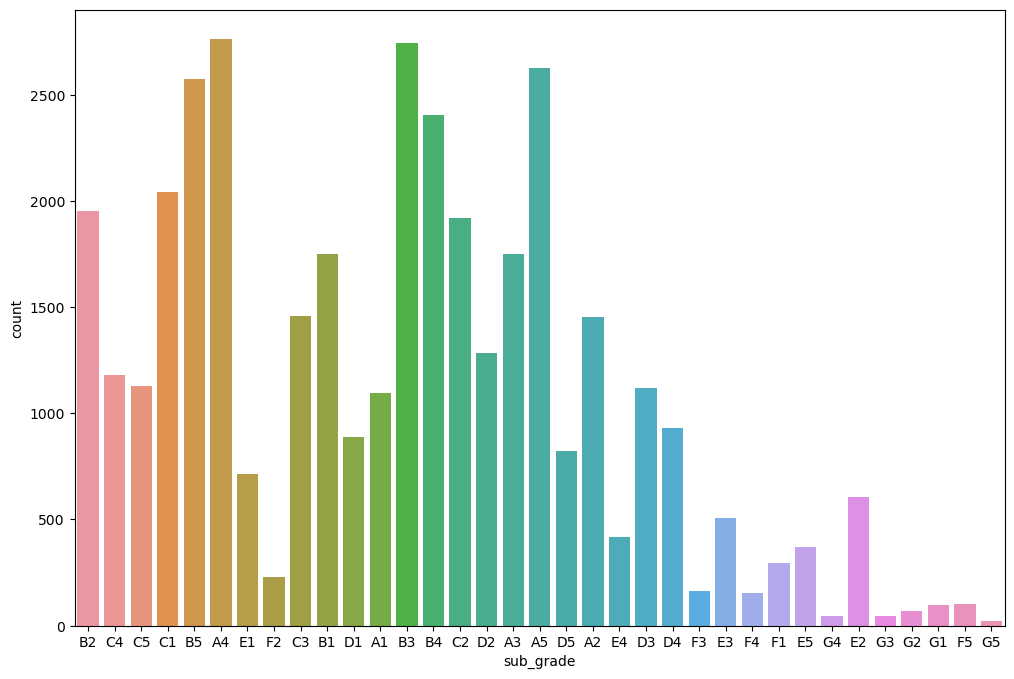

In [53]:
# Plot a chart to see the outliers of sub_grade
fig, ax = plt.subplots(figsize=(12,8))
sns.set_palette('colorblind')
sns.countplot(x = 'sub_grade', data = loan_info, linewidth=50)

In [45]:
loan_info.purpose.describe()

count                  37730
unique                    14
top       debt_consolidation
freq                   17859
Name: purpose, dtype: object

<Axes: xlabel='count', ylabel='purpose'>

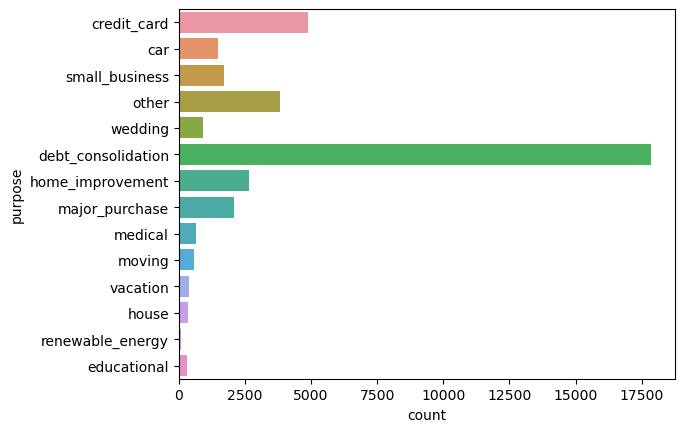

In [56]:
# Plot a chart to see the outliers of purpose
sns.countplot(y = 'purpose', data = loan_info)

<Axes: xlabel='grade', ylabel='count'>

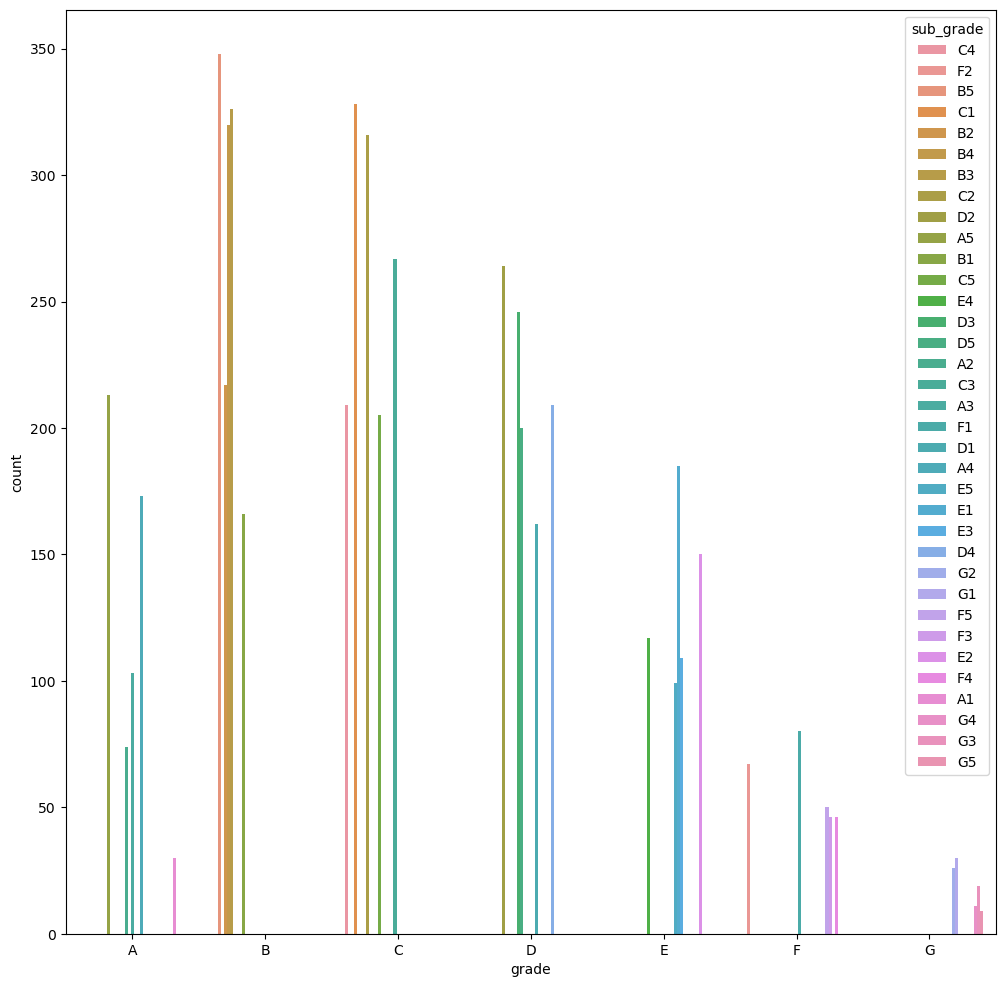

In [54]:
fig, ax = plt.subplots(figsize=(12,12))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_info[loan_info.loan_status == 'Charged Off'])

In [ ]:
# Checking unique values for home_ownership
loan_info['home_ownership'].unique()

In [ ]:
# Check home ownership which is of Charged Off status
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_info[loan_info['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='purpose'>

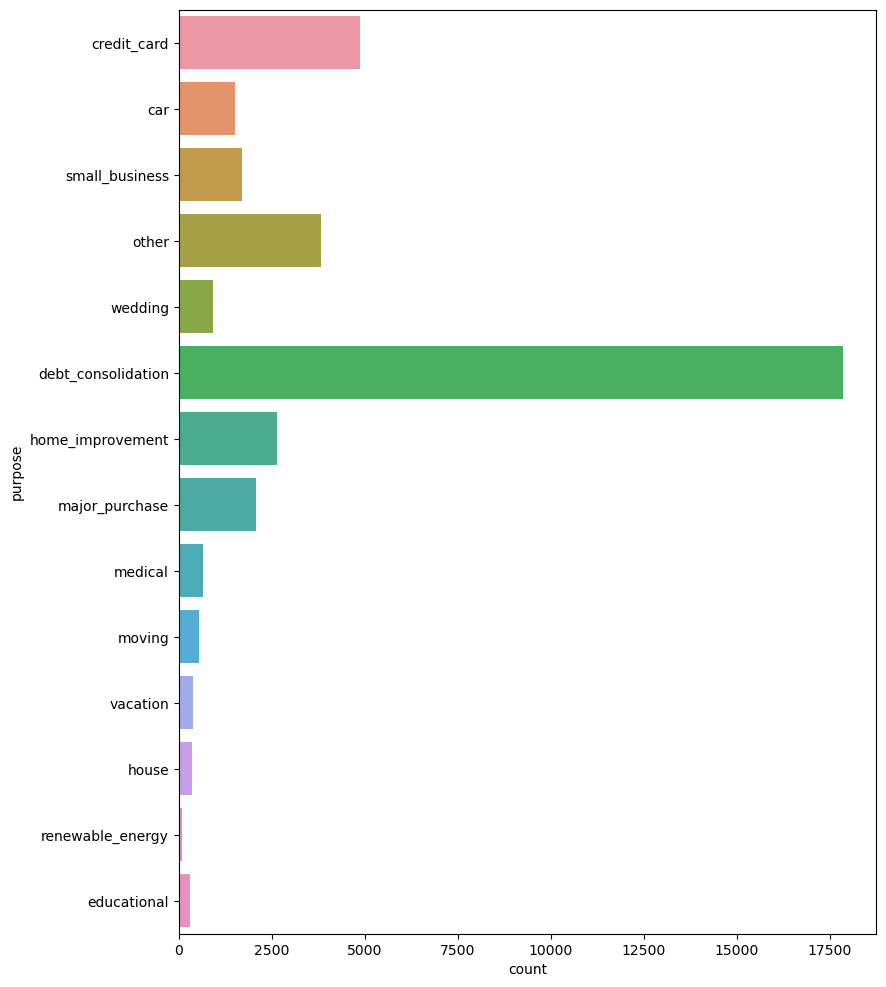

In [55]:
# Check purpose which is of Charged Off status
fig, ax = plt.subplots(figsize=(9,12))
sns.set_palette('colorblind')
sns.countplot(y = 'purpose', data = loan_info)

In [57]:
# Creating bins for some numerical variable to make them categorical which will help in doing bivariate analysis
# Creating bins for int_rate, open_acc, revol_util, total_acc, annual_inc and dti
loan_info['int_rate_groups'] = pd.cut(loan_info['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_info['open_acc_groups'] = pd.cut(loan_info['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_info['revol_util_groups'] = pd.cut(loan_info['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_info['total_acc_groups'] = pd.cut(loan_info['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_info['annual_inc_groups'] = pd.cut(loan_info['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_info['dti_groups'] = pd.cut(loan_info['dti'], bins=5,precision =0, labels=['0-5', '05-10', '10-15', '15-20', '25+'])
loan_info['loan_amnt_groups'] = pd.cut(loan_info['loan_amnt'], bins=5,precision =0, labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])